1. Import and Create a Plot

In [1]:
import pandas as pd #import all necessary libraries
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.api as sm

In [2]:
df = pd.read_csv('ArrowrockReservoirElevation.csv', names=['Elevation','Y','M','D'], skiprows=1) #read in csv with Elevation data
df['SerDates'] = pd.to_datetime(df.Y*10000+df.M*100+df.D,format='%Y%m%d') #Define the datetime format

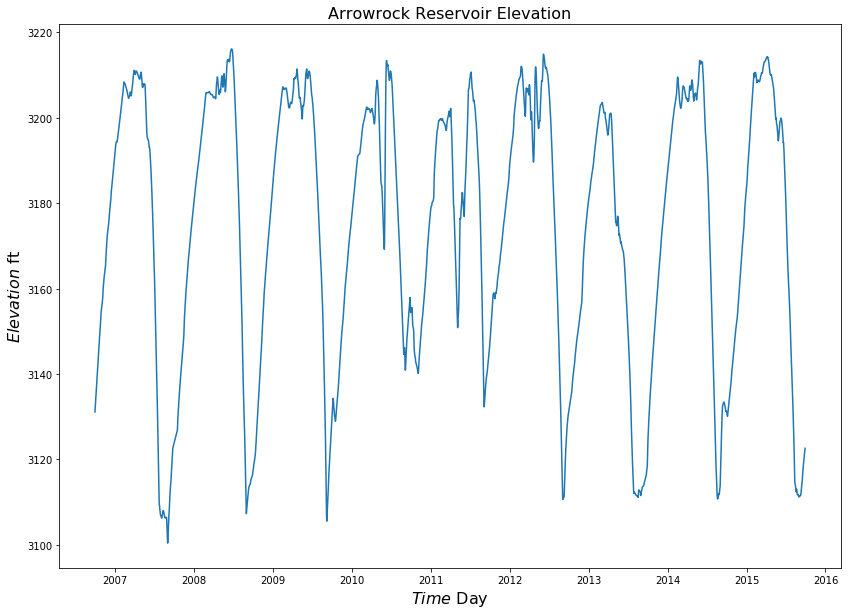

In [3]:
E = df['Elevation'].values #Set variable for Elevation data
Time = df['SerDates'].values #Set variable for Time component of elevation data
Et   = E[1:-1] 
T   = Time[1:-1] 
plt.figure(figsize=(14,10)) #Call figure and plot elevation data over time
plt.plot(T,Et)
plt.title('Arrowrock Reservoir Elevation',fontsize=16)
plt.xlabel('$Time$ Day',fontsize=16)
plt.ylabel('$Elevation$ ft',fontsize=16)
plt.show()

2. Compute and Report Key Statistics

In [4]:
Mean_Elev = np.mean(Et)
Mean_Elev

3174.7757503805174

In [5]:
Var = np.var(Et)
Var

1008.3724458676749

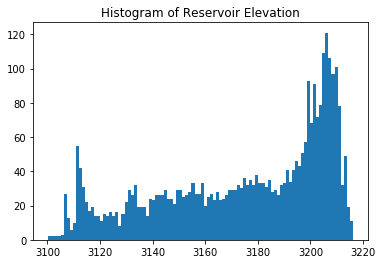

In [6]:
plt.hist(E, bins=100)  # plot histogram of reservoir elevations
plt.title("Histogram of Reservoir Elevation") # add title to histogram
plt.show() #show histogram

3. Implement and report Augmented Dickey-Fuller Test to look for Stationarity

In [7]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(E)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
# The ADF statistic of the Arrowrock Reservoir elevation dataset is smaller than each of the critical values, 
# indicating that the null hypothesis of non-stationarity is incorrect, thus the dataset is stationary.

ADF Statistic: -5.522391
p-value: 0.000002
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


4. Compute and Plot Autocorrelation Test

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:2995: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:2929: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:2929: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)


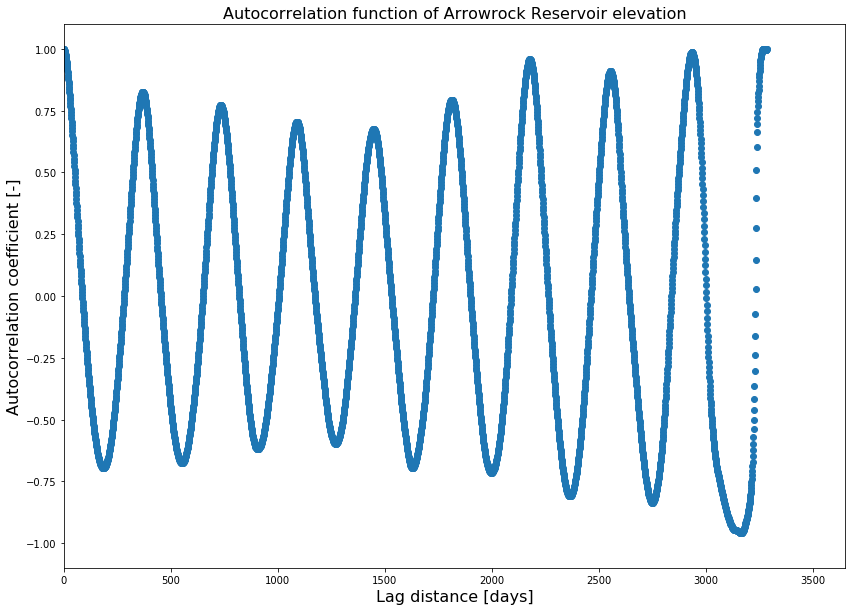

In [8]:
Et   = E[3650:-1] 
Etmk = E[0:-(3651)]

# Use Matplotlib to create a scatter plot of these two time series, create a title and label axes

R = np.corrcoef(Etmk,Et)
R[1,0]

Nk = 3650
K  = np.arange(0,Nk,1)
Rk = np.zeros((Nk,1))

for k in K:
    Et   = E[k:-1] 
    Etmk = E[0:-(1+k)]
    R = np.corrcoef(Etmk,Et)
    Rk[k] = R[1,0]
  

plt.figure(figsize=(14,10))
plt.plot(K,Rk,'o')
plt.xlim(0.0,np.amax(K.astype(float)))
plt.ylim(-1.1,1.1)
plt.title('Autocorrelation function of Arrowrock Reservoir elevation',fontsize=16)
plt.xlabel('Lag distance [days]',fontsize=16)
plt.ylabel('Autocorrelation coefficient [-]',fontsize=16)
plt.show()

# The autocorrelation of 5 years of data shows that a trend over time is unlikely within these data. 

Discuss:
The autocorrelation analysis of the water elevation data of Arrowrock Reservoir reveals a cyclical nature in which a given measurement likely correlates more with a measurement a year from that time rather than with a measurement a month from that time. This is intuitive as the nature of water in the mountainous west precipitates in a cyclical way and this is mirrored in water bodies such as reservoirs. There may be short term (yearly) trends in high and low water levels, but there likely is no perceivable trend among the entire dataset (10 years). 